In [127]:
#Importing Required Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import scale

# hide warnings
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Step 1: Reading and Understanding of the Housing Data Set

In [128]:
# reading the dataset
house_pricing = pd.read_csv("train.csv")

In [129]:
#reading the dataset
house_pricing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [130]:
#checking shape of dataset
house_pricing.shape

(1460, 81)

In [131]:
#checking info of dataset
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [132]:
#checking describe of dataset
house_pricing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [133]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns = house_pricing.isnull().sum()/len(house_pricing)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

# Step 2: Date Cleaning of the Housing Data Set

2.1 Duplicate Value check

In [134]:
# Check if there are any duplicate values in the dataset
sum(house_pricing.duplicated(subset = 'Id')) == 0

True

2.2 Null Value Treatement

2.2.1 Null Value Treatement for Categorical Variables

In [135]:
#Categorical Variables
categorical_columns = house_pricing.select_dtypes(include=['object'])
categorical_columns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [136]:
#Categorical Variables with Null
categorical_columns_with_null = categorical_columns.isnull().sum()[categorical_columns.isnull().sum()>0]
categorical_columns_with_null.index

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [137]:
# 'NotAvailable' in case of NA for Categorical Variable with Null Values.
for col in (categorical_columns_with_null.index):    
    house_pricing[col]=house_pricing[col].fillna('NotAvailable')

In [138]:
# Verifying at this stage there should not be any more Null Values in Categorical Variables.
categorical_columns = house_pricing.select_dtypes(include=['object'])
categorical_columns_with_null = categorical_columns.isnull().sum()[categorical_columns.isnull().sum()>0]
categorical_columns_with_null.index

Index([], dtype='object')

In [139]:
# Dropping the categorical columns is having same values 85% and more.
for col in (categorical_columns):
    if(house_pricing[col].value_counts().max() >= 1241):
        house_pricing.drop(col, axis = 1, inplace = True)

In [140]:
house_pricing.shape

(1460, 60)

2.2.2 Null Value Treatement for Numerical Variables

In [141]:
numerical_columns = house_pricing.select_dtypes(include=['int64','float'])
numerical_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [142]:
numerical_columns_with_null = numerical_columns.isnull().sum()[numerical_columns.isnull().sum()>0]
numerical_columns_with_null.index

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [143]:
house_pricing['GarageYrBlt'] = house_pricing['GarageYrBlt'].fillna(0)
house_pricing['GarageYrBlt'] = house_pricing['GarageYrBlt'].astype(int)

In [144]:
numerical_columns = house_pricing.select_dtypes(include=['int64','float'])
numerical_columns_with_null = numerical_columns.isnull().sum()[numerical_columns.isnull().sum()>0]
numerical_columns_with_null.index

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [145]:
# Numerical variables missing value filled with median.
for col in (numerical_columns_with_null.index):
    house_pricing[col] = house_pricing[col].fillna(house_pricing[col].median())  

In [146]:
# Verifying at this stage there should not be any more Null Values in Numerical Variables.
numerical_columns = house_pricing.select_dtypes(include=['int64','float'])
numerical_columns_with_null = numerical_columns.isnull().sum()[numerical_columns.isnull().sum()>0]
numerical_columns_with_null.index

Index([], dtype='object')

In [147]:
# Dropping the Numerical columns is having same values 85% and more.
for col in (numerical_columns):
    if(house_pricing[col].value_counts().max() >= 1241):
        house_pricing.drop(col, axis = 1, inplace = True)

In [148]:
house_pricing.shape

(1460, 51)

In [149]:
#checking Null Percentage again to ensure no more null values in the variables.
null_percentage_Of_Columns = house_pricing.isnull().sum()/len(house_pricing)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

Series([], dtype: float64)

Treatment Completed for Null Values and same values present for 85%

2.3 Deriving New Colums based on the exisiting columns

In [150]:
#Adding a new Column which will tell Remodel or not.
def isRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return -1
    
house_pricing['Remodel'] = house_pricing.apply(isRemodel, axis=1)
house_pricing.head()   

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      CollgCr     1Fam     2Story            7            5       2003   
1      Veenker     1Fam     1Story            6            8       1976   
2      CollgCr     1Fam     2Story            7            5       2001   
3      Crawfor     1Fam     2Story            7            5       1915   
4      NoRidge     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   
3          1970     Gable     Wd Sdng     Wd Shng       None         0.0   
4          2000     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  \
0        150          856        Ex       856       854       1710   
1        284         1262        Ex      1262         0       1262   
2        434          920        Ex       920       866       1786   
3        540          756        Gd       961       756       1717   
4        490         1145        Ex      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  \
0             1         2         1             3          Gd             8   
1             0         2         0             3          TA             6   
2             1         2         1             3          Gd             6   
3             1         1         0             3          Gd             7   
4             1         2         1             4          Gd             9   

   Fireplaces   FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0  NotAvailable     Attchd         2003          RFn           2   
1           1            TA     Attchd         1976          RFn           2   
2           1            TA     Attchd         2001          RFn           2   
3           1            Gd     Detchd         1998          Unf           3   
4           1            TA     Attchd         2000          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF         Fence  MoSold  YrSold  \
0         548           0           61  NotAvailable       2    2008   
1         460         298            0  NotAvailable       5    2007   
2         608           0           42  NotAvailable       9    2008   
3         642           0           35  NotAvailable       2    2006   
4         836         192           84  NotAvailable      12    2008   

  SaleCondition  SalePrice  Remodel  
0        Normal     208500        0  
1        Normal     181500        0  
2        Normal     223500        1  
3       Abnorml     140000        1  
4        Normal     250000        0

In [151]:
# Adding a new column for Building Age

def calAgeOfBuilding(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house_pricing['AgeOfBuilding'] = house_pricing.apply(calAgeOfBuilding, axis=1)
house_pricing.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      CollgCr     1Fam     2Story            7            5       2003   
1      Veenker     1Fam     1Story            6            8       1976   
2      CollgCr     1Fam     2Story            7            5       2001   
3      Crawfor     1Fam     2Story            7            5       1915   
4      NoRidge     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   
3          1970     Gable     Wd Sdng     Wd Shng       None         0.0   
4          2000     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  \
0        150          856        Ex       856       854       1710   
1        284         1262        Ex      1262         0       1262   
2        434          920        Ex       920       866       1786   
3        540          756        Gd       961       756       1717   
4        490         1145        Ex      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  \
0             1         2         1             3          Gd             8   
1             0         2         0             3          TA             6   
2             1         2         1             3          Gd             6   
3             1         1         0             3          Gd             7   
4             1         2         1             4          Gd             9   

   Fireplaces   FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0  NotAvailable     Attchd         2003          RFn           2   
1           1            TA     Attchd         1976          RFn           2   
2           1            TA     Attchd         2001          RFn           2   
3           1            Gd     Detchd         1998          Unf           3   
4           1            TA     Attchd         2000          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF         Fence  MoSold  YrSold  \
0         548           0           61  NotAvailable       2    2008   
1         460         298            0  NotAvailable       5    2007   
2         608           0           42  NotAvailable       9    2008   
3         642           0           35  NotAvailable       2    2006   
4         836         192           84  NotAvailable      12    2008   

  SaleCondition  SalePrice  Remodel  AgeOfBuilding  
0        Normal     208500        0              5  
1        Normal     181500        0             31  
2        Normal     223500        1              6  
3       Abnorml     140000        1             36  
4        Normal     250000        0              8

In [152]:
# Adding a new column if the Garage is old or new.
# Considered if Garage before 2000 then old:0  else new:1. 

def isGarageNew(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house_pricing['newGarage'] = house_pricing['GarageYrBlt'].apply(isGarageNew)
house_pricing.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      CollgCr     1Fam     2Story            7            5       2003   
1      Veenker     1Fam     1Story            6            8       1976   
2      CollgCr     1Fam     2Story            7            5       2001   
3      Crawfor     1Fam     2Story            7            5       1915   
4      NoRidge     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   
3          1970     Gable     Wd Sdng     Wd Shng       None         0.0   
4          2000     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  \
0        150          856        Ex       856       854       1710   
1        284         1262        Ex      1262         0       1262   
2        434          920        Ex       920       866       1786   
3        540          756        Gd       961       756       1717   
4        490         1145        Ex      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  \
0             1         2         1             3          Gd             8   
1             0         2         0             3          TA             6   
2             1         2         1             3          Gd             6   
3             1         1         0             3          Gd             7   
4             1         2         1             4          Gd             9   

   Fireplaces   FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0  NotAvailable     Attchd         2003          RFn           2   
1           1            TA     Attchd         1976          RFn           2   
2           1            TA     Attchd         2001          RFn           2   
3           1            Gd     Detchd         1998          Unf           3   
4           1            TA     Attchd         2000          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF         Fence  MoSold  YrSold  \
0         548           0           61  NotAvailable       2    2008   
1         460         298            0  NotAvailable       5    2007   
2         608           0           42  NotAvailable       9    2008   
3         642           0           35  NotAvailable       2    2006   
4         836         192           84  NotAvailable      12    2008   

  SaleCondition  SalePrice  Remodel  AgeOfBuilding  newGarage  
0        Normal     208500        0              5          1  
1        Normal     181500        0             31          0  
2        Normal     223500        1              6          1  
3       Abnorml     140000        1             36          0  
4        Normal     250000        0              8          1

In [153]:
# Dropping the colums as we have derived required columns. 
# In additionn with this dropping 'MoSold' as month will not be that much impact var.
house_pricing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt','MoSold'], axis = 1, inplace = True)

In [154]:
# Dropping the Numerical columns is having same values 85% and more.
numeric_columns = house_pricing.select_dtypes(include=['int64', 'float'])
for col in (numeric_columns):
   if(house_pricing[col].value_counts().max() >= 1241):
       house_pricing.drop(col, axis = 1, inplace = True)

In [155]:
house_pricing.shape

(1460, 49)

In [156]:
house_pricing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr     1Fam     2Story            7            5     Gable   
1      Veenker     1Fam     1Story            6            8     Gable   
2      CollgCr     1Fam     2Story            7            5     Gable   
3      Crawfor     1Fam     2Story            7            5     Gable   
4      NoRidge     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       Gd           No          GLQ         706        150          856   
1       Gd           Gd          ALQ         978        284         1262   
2       Gd           Mn          GLQ         486        434          920   
3       TA           No          ALQ         216        540          756   
4       Gd           Av          GLQ         655        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        Ex       856       854       1710             1         2         1   
1        Ex      1262         0       1262             0         2         0   
2        Ex       920       866       1786             1         2         1   
3        Gd       961       756       1717             1         1         0   
4        Ex      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces   FireplaceQu  \
0             3          Gd             8           0  NotAvailable   
1             3          TA             6           1            TA   
2             3          Gd             6           1            TA   
3             3          Gd             7           1            Gd   
4             4          Gd             9           1            TA   

  GarageType GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     Attchd          RFn           2         548           0           61   
1     Attchd          RFn           2         460         298            0   
2     Attchd          RFn           2         608           0           42   
3     Detchd          Unf           3         642           0           35   
4     Attchd          RFn           3         836         192           84   

          Fence SaleCondition  SalePrice  Remodel  AgeOfBuilding  newGarage  
0  NotAvailable        Normal     208500        0              5          1  
1  NotAvailable        Normal     181500        0             31          0  
2  NotAvailable        Normal     223500        1              6          1  
3  NotAvailable       Abnorml     140000        1             36          0  
4  NotAvailable        Normal     250000        0              8          1

2.4 Outlier Treatment

In [157]:
house_pricing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      5.575342   103.117123   443.639726   567.240411  1057.429452   
std       1.112799   180.731373   456.098091   441.866955   438.705324   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.000000     0.000000   223.000000   795.750000   
50%       5.000000     0.000000   383.500000   477.500000   991.500000   
75%       6.000000   164.250000   712.250000   808.000000  1298.250000   
90%       7.000000   335.000000  1065.500000  1232.000000  1602.200000   
95%       8.000000   456.000000  1274.000000  1468.000000  1753.000000   
99%       9.000000   791.280000  1572.410000  1797.050000  2155.050000   
max       9.000000  1600.000000  5644.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath     FullBath  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1162.626712   346.992466  1515.463699      0.425342     1.565068   
std     386.587738   436.528436   525.480383      0.518911     0.550916   
min     334.000000     0.000000   334.000000      0.000000     0.000000   
25%     882.000000     0.000000  1129.500000      0.000000     1.000000   
50%    1087.000000     0.000000  1464.000000      0.000000     2.000000   
75%    1391.250000   728.000000  1776.750000      1.000000     2.000000   
90%    1680.000000   954.200000  2158.300000      1.000000     2.000000   
95%    1831.250000  1141.050000  2466.100000      1.000000     2.000000   
99%    2219.460000  1418.920000  3123.480000      2.000000     3.000000   
max    4692.000000  2065.000000  5642.000000      3.000000     3.000000   

          HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean      0.382877      2.866438      6.517808     0.613014     1.767123   
std       0.502885      0.815778      1.625393     0.644666     0.747315   
min       0.000000      0.000000      2.000000     0.000000     0.000000   
25%       0.000000      2.000000      5.000000     0.000000     1.000000   
50%       0.000000      3.000000      6.000000     1.000000     2.000000   
75%       1.000000      3.000000      7.000000     1.000000     2.000000   
90%       1.000000      4.000000      9.000000     1.000000     3.000000   
95%       1.000000      4.000000     10.000000     2.000000     3.000000   
99%       1.000000      5.000000     11.000000     2.000000     3.000000   
max       2.000000      8.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF      SalePrice      Remodel  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274  180921.195890     0.476712   
std     213.804841   125.338794    66.256028   79442.502883     0.499629   
min       0.000000     0.000000     0.000000   34900.000000     0.000000   
25%     334.500000  

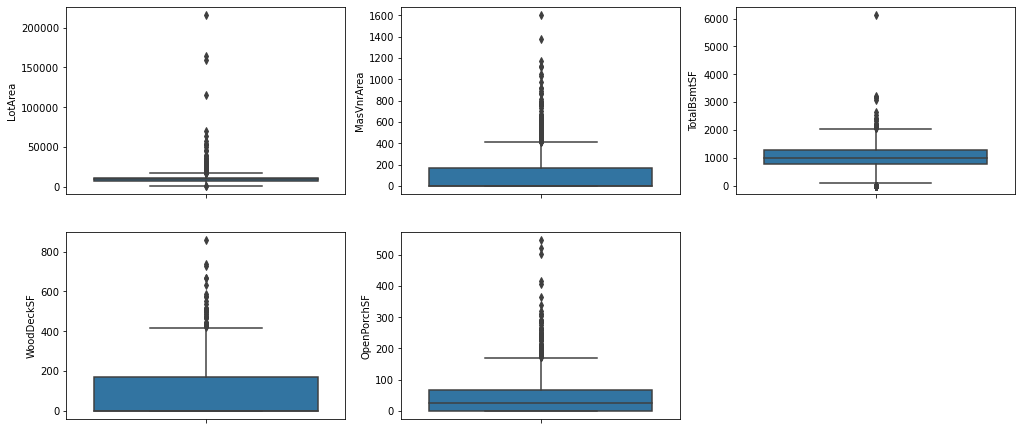

In [158]:
#Checking Outliesrs
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = house_pricing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = house_pricing)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = house_pricing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = house_pricing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = house_pricing)
plt.show()

In [159]:
#Removing Outliers
outlier_column = ['LotArea','MasVnrArea','TotalBsmtSF','WoodDeckSF','OpenPorchSF']

for col in outlier_column:
    quartile = house_pricing[col].quantile(0.98)
    house_pricing = house_pricing[house_pricing[col] < quartile]

In [160]:
num_data = round(100*(len(house_pricing)/1460),2)
print(num_data)

90.21


# Step 3: Data Visualization - Univarate & Bivariate Analysis

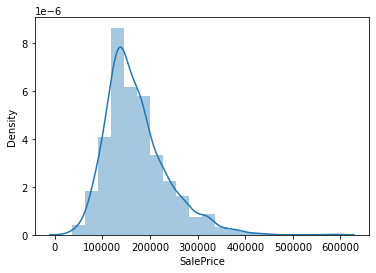

In [161]:
sns.distplot(house_pricing['SalePrice'], bins=20)
plt.show()

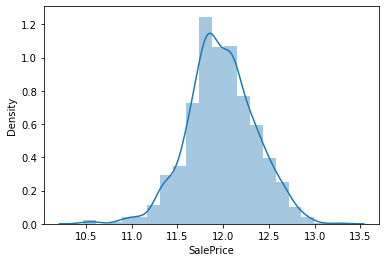

In [162]:
house_pricing['SalePrice'] = np.log1p(house_pricing['SalePrice'])
sns.distplot(house_pricing['SalePrice'], bins=20)
plt.show()

<Figure size 720x360 with 0 Axes>

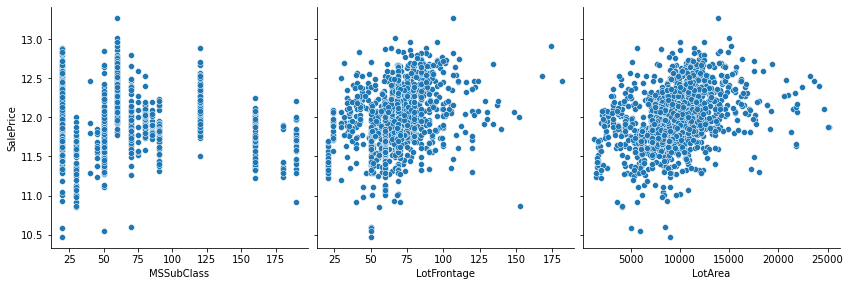

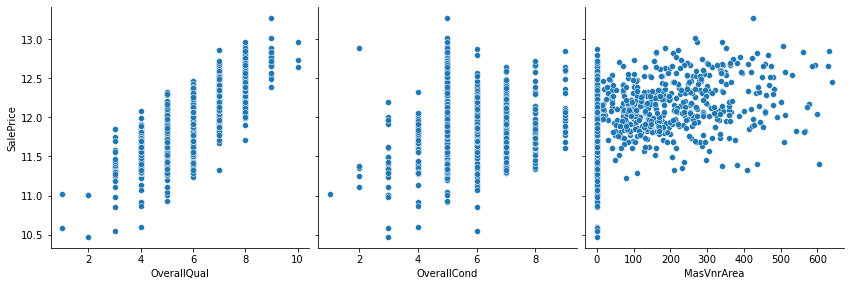

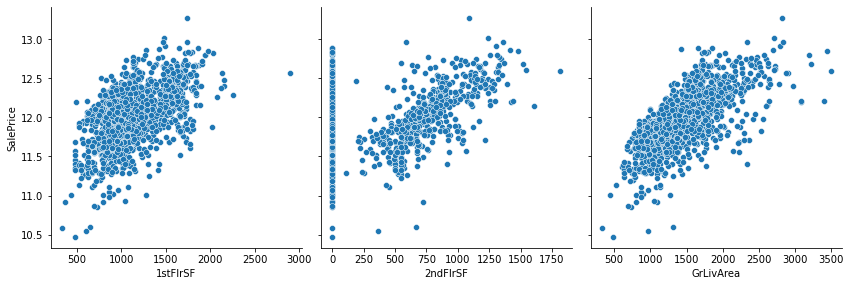

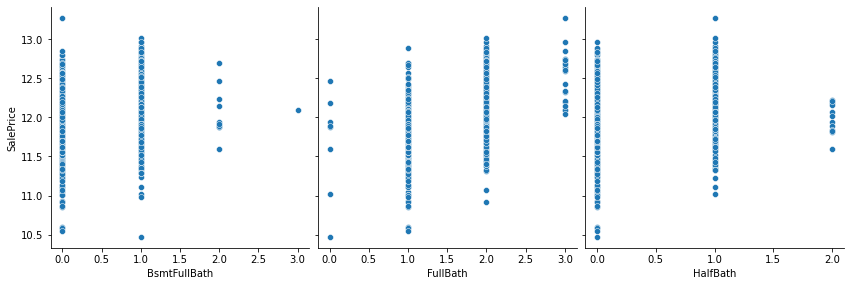

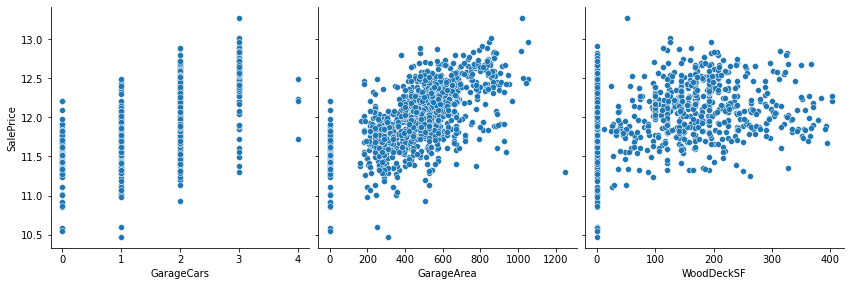

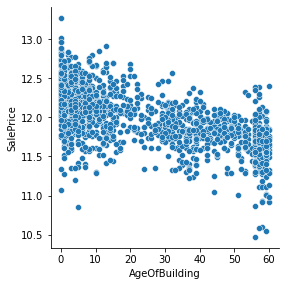

In [163]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house_pricing, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_pricing, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_pricing, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_pricing, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_pricing, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_pricing, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_pricing, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_pricing, x_vars=['OpenPorchSF','SalePrice', 'Remodel'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_pricing, x_vars=['AgeOfBuilding'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

### correlation Shown in above pairplot : '1stFlrSF','2ndFlrSF', 'GrLivArea'

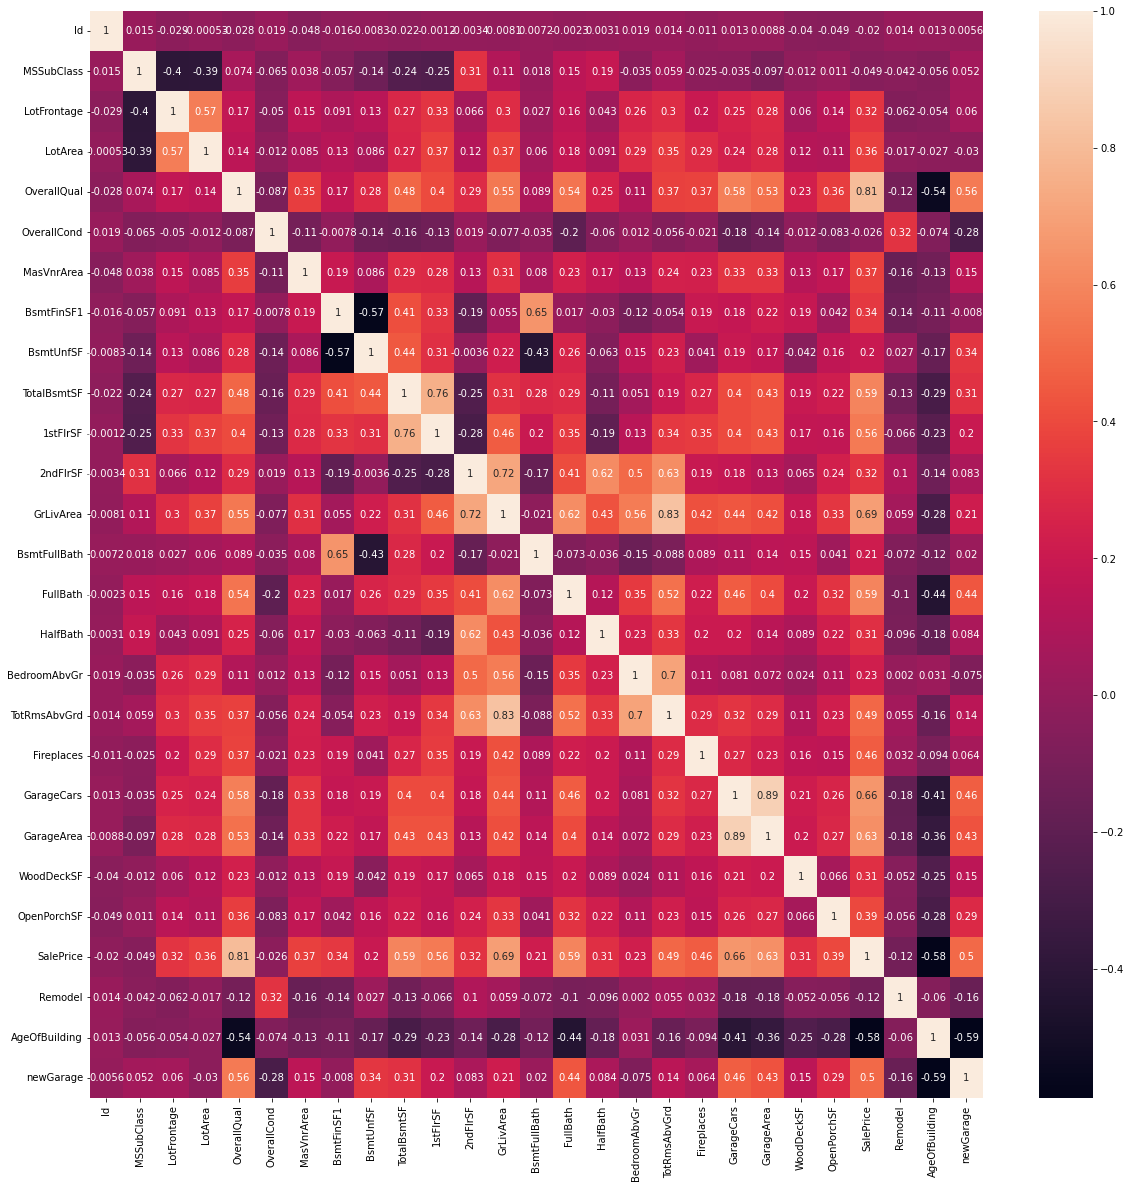

In [164]:
plt.figure(figsize = (20, 20))
sns.heatmap(house_pricing.corr(), annot = True)
plt.show()

In [165]:
#High Correlation Observed :
# 'GrLivArea' vs 'TotRmsAbvGrd' : 83%
# 'GarageArea' vs 'GarageCars'  : 89%
#Removing High correlated variable.
house_pricing.drop(['TotRmsAbvGrd', 'GarageCars'], axis = 1, inplace = True)

In [166]:
house_pricing.shape

(1317, 47)

In [167]:
house_pricing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr     1Fam     2Story            7            5     Gable   
1      Veenker     1Fam     1Story            6            8     Gable   
2      CollgCr     1Fam     2Story            7            5     Gable   
3      Crawfor     1Fam     2Story            7            5     Gable   
4      NoRidge     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       Gd           No          GLQ         706        150          856   
1       Gd           Gd          ALQ         978        284         1262   
2       Gd           Mn          GLQ         486        434          920   
3       TA           No          ALQ         216        540          756   
4       Gd           Av          GLQ         655        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        Ex       856       854       1710             1         2         1   
1        Ex      1262         0       1262             0         2         0   
2        Ex       920       866       1786             1         2         1   
3        Gd       961       756       1717             1         1         0   
4        Ex      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  Fireplaces   FireplaceQu GarageType GarageFinish  \
0             3          Gd           0  NotAvailable     Attchd          RFn   
1             3          TA           1            TA     Attchd          RFn   
2             3          Gd           1            TA     Attchd          RFn   
3             3          Gd           1            Gd     Detchd          Unf   
4             4          Gd           1            TA     Attchd          RFn   

   GarageArea  WoodDeckSF  OpenPorchSF         Fence SaleCondition  SalePrice  \
0         548           0           61  NotAvailable        Normal  12.247699   
1         460         298            0  NotAvailable        Normal  12.109016   
2         608           0           42  NotAvailable        Normal  12.317171   
3         642           0           35  NotAvailable       Abnorml  11.849405   
4         836         192           84  NotAvailable        Normal  12.429220   

   Remodel  AgeOfBuilding  newGarage  
0        0              5          1  
1        0             31          0  
2        1              6          1  
3        1             36          0  
4        0              8          1

# Step 4: Data Preparation - Creating Dummy Variables

In [168]:
#variable mapping:
house_pricing['temp_LotShape'] = house_pricing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_pricing['temp_ExterQual'] = house_pricing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_pricing['temp_BsmtQual'] = house_pricing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NotAvailable': 0})
house_pricing['temp_BsmtExposure'] = house_pricing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NotAvailable': 0})
house_pricing['temp_BsmtFinType1'] = house_pricing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NotAvailable': 0})
house_pricing['temp_HeatingQC'] = house_pricing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_pricing['temp_KitchenQual'] = house_pricing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_pricing['temp_FireplaceQu'] = house_pricing['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NotAvailable': 0})
house_pricing['temp_GarageFinish'] = house_pricing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NotAvailable': 0 })
house_pricing['temp_BldgType'] = house_pricing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
house_pricing['temp_HouseStyle'] = house_pricing['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_pricing['temp_Fence'] = house_pricing['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'NotAvailable': 0 })
house_pricing['temp_LotConfig'] = house_pricing['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
house_pricing['temp_MasVnrType'] = house_pricing['MasVnrType'].map({'CBlock' : 1, 'BrkFace': 1, 'Stone': 1, 'BrkCmn': 1, 'None': 0, 'NotAvailable': 0 })
house_pricing['temp_SaleCondition'] = house_pricing['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})
house_pricing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr     1Fam     2Story            7            5     Gable   
1      Veenker     1Fam     1Story            6            8     Gable   
2      CollgCr     1Fam     2Story            7            5     Gable   
3      Crawfor     1Fam     2Story            7            5     Gable   
4      NoRidge     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       Gd           No          GLQ         706        150          856   
1       Gd           Gd          ALQ         978        284         1262   
2       Gd           Mn          GLQ         486        434          920   
3       TA           No          ALQ         216        540          756   
4       Gd           Av          GLQ         655        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        Ex       856       854       1710             1         2         1   
1        Ex      1262         0       1262             0         2         0   
2        Ex       920       866       1786             1         2         1   
3        Gd       961       756       1717             1         1         0   
4        Ex      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  Fireplaces   FireplaceQu GarageType GarageFinish  \
0             3          Gd           0  NotAvailable     Attchd          RFn   
1             3          TA           1            TA     Attchd          RFn   
2             3          Gd           1            TA     Attchd          RFn   
3             3          Gd           1            Gd     Detchd          Unf   
4             4          Gd           1            TA     Attchd          RFn   

   GarageArea  WoodDeckSF  OpenPorchSF         Fence SaleCondition  SalePrice  \
0         548           0           61  NotAvailable        Normal  12.247699   
1         460         298            0  NotAvailable        Normal  12.109016   
2         608           0           42  NotAvailable        Normal  12.317171   
3         642           0           35  NotAvailable       Abnorml  11.849405   
4         836         192           84  NotAvailable        Normal  12.429220   

   Remodel  AgeOfBuilding  newGarage  temp_LotShape  temp_ExterQual  \
0        0              5          1              3               4   
1        0             31          0              3               3   
2        1              6          1              2               4   
3        1             36          0              2               3   
4        0              8          1              2               4   

   temp_BsmtQual  temp_BsmtExposure  temp_BsmtFinType1  temp_HeatingQC  \
0              4                  1                  6               5   
1              4                  4                  5               5   
2              4                  2                  6               5   
3              3                  1                  5   

In [169]:
house_pricing = house_pricing.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house_pricing.rename(columns = {'temp_LotShape':'LotShape','temp_ExterQual':'ExterQual','temp_BsmtQual':'BsmtQual','temp_BsmtExposure':'BsmtExposure','temp_BsmtFinType1':'BsmtFinType1','temp_HeatingQC':'HeatingQC','temp_KitchenQual':'KitchenQual','temp_FireplaceQu':'FireplaceQu','temp_GarageFinish':'GarageFinish','temp_BldgType':'BldgType','temp_HouseStyle':'HouseStyle','temp_Fence':'Fence','temp_LotConfig':'LotConfig','temp_MasVnrType':'MasVnrType','temp_SaleCondition':'SaleCondition'}, inplace = True)
house_pricing.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
1          20       RL         80.0     9600      Veenker            6   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
4          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  MasVnrArea Foundation  \
0            5     Gable     VinylSd     VinylSd       196.0      PConc   
1            8     Gable     MetalSd     MetalSd         0.0     CBlock   
2            5     Gable     VinylSd     VinylSd       162.0      PConc   
3            5     Gable     Wd Sdng     Wd Shng         0.0     BrkTil   
4            5     Gable     VinylSd     VinylSd       350.0      PConc   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces GarageType  \
0             1         2         1             3           0     Attchd   
1             0         2         0             3           1     Attchd   
2             1         2         1             3           1     Attchd   
3             1         1         0             3           1     Detchd   
4             1         2         1             4           1     Attchd   

   GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  Remodel  AgeOfBuilding  \
0         548           0           61  12.247699        0              5   
1         460         298            0  12.109016        0             31   
2         608           0           42  12.317171        1              6   
3         642           0           35  11.849405        1             36   
4         836         192           84  12.429220        0              8   

   newGarage  LotShape  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
0          1         3          4         4             1             6   
1          0         3          3         4             4             5   
2          1         2          4         4             2             6   
3          0         2          3         3             1             5   
4          1         2          4         4             3             6   

   HeatingQC  KitchenQual  FireplaceQu  GarageFinish  BldgType  HouseStyle  \
0          5            4            0             2         1           4   
1          5            3            3             2         1           1   
2          5            4            3             2         1           4   
3          4            4            4             1         1           4   
4          5            4            3             2         1           4   

   Fence  LotConfig  MasVnrType  SaleCondition  
0      0          5           1              1  
1      0          2           0              1  
2      0          5           1              1  
3      0          4           0              0  
4      0          2           1              1

In [170]:
house_pricing.shape

(1317, 46)

In [171]:

# Creating dummies for MSZoning

MSZoning     = pd.get_dummies(house_pricing['MSZoning'], prefix='MSZoning', drop_first = True)
Neighborhood = pd.get_dummies(house_pricing['Neighborhood'], prefix='Neighborhood', drop_first = True)
RoofStyle    = pd.get_dummies(house_pricing['RoofStyle'], prefix='RoofStyle', drop_first = True)
Exterior1st  = pd.get_dummies(house_pricing['Exterior1st'], prefix='Exterior1st', drop_first = True)
Exterior2nd  = pd.get_dummies(house_pricing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
Foundation   = pd.get_dummies(house_pricing['Foundation'], prefix='Foundation', drop_first = True)
GarageType   = pd.get_dummies(house_pricing['GarageType'], prefix='GarageType', drop_first = True)

house_pricing = pd.concat([house_pricing,MSZoning,Neighborhood,RoofStyle,Exterior1st,Exterior2nd,Foundation,GarageType], axis = 1)

house_pricing.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
1          20       RL         80.0     9600      Veenker            6   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
4          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  MasVnrArea Foundation  \
0            5     Gable     VinylSd     VinylSd       196.0      PConc   
1            8     Gable     MetalSd     MetalSd         0.0     CBlock   
2            5     Gable     VinylSd     VinylSd       162.0      PConc   
3            5     Gable     Wd Sdng     Wd Shng         0.0     BrkTil   
4            5     Gable     VinylSd     VinylSd       350.0      PConc   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces GarageType  \
0             1         2         1             3           0     Attchd   
1             0         2         0             3           1     Attchd   
2             1         2         1             3           1     Attchd   
3             1         1         0             3           1     Detchd   
4             1         2         1             4           1     Attchd   

   GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  Remodel  AgeOfBuilding  \
0         548           0           61  12.247699        0              5   
1         460         298            0  12.109016        0             31   
2         608           0           42  12.317171        1              6   
3         642           0           35  11.849405        1             36   
4         836         192           84  12.429220        0              8   

   newGarage  LotShape  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
0          1         3          4         4             1             6   
1          0         3          3         4             4             5   
2          1         2          4         4             2             6   
3          0         2          3         3             1             5   
4          1         2          4         4             3             6   

   HeatingQC  KitchenQual  FireplaceQu  GarageFinish  BldgType  HouseStyle  \
0          5            4            0             2         1           4   
1          5            3            3             2         1           1   
2          5            4            3             2         1           4   
3          4            4            4             1         1           4   
4          5            4            3             2         1           4   

   Fence  LotConfig  MasVnrType  SaleCondition  MSZoning_FV  MSZoning_RH  \
0      0          5           1              1            0            0   
1      0          2           0              1            0            0   
2      0          5           1              1            0            0   
3      0          4           0              0            0            0   
4      0          2           1              1            0            0   

   MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
0            1            0                     0                    0   
1            1            0                     0                    0   
2            1            0                     0                    0   
3            1            0                     0                    0   
4      

In [172]:
house_pricing.shape

(1317, 119)

In [173]:
house_pricing = house_pricing.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

house_pricing.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
0             1         2         1             3           0         548   
1             0         2         0             3           1         460   
2             1         2         1             3           1         608   
3             1         1         0             3           1         642   
4             1         2         1             4           1         836   

   WoodDeckSF  OpenPorchSF  SalePrice  Remodel  AgeOfBuilding  newGarage  \
0           0           61  12.247699        0              5          1   
1         298            0  12.109016        0             31          0   
2           0           42  12.317171        1              6          1   
3           0           35  11.849405        1             36          0   
4         192           84  12.429220        0              8          1   

   LotShape  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
0         3          4         4             1             6          5   
1         3          3         4             4             5          5   
2         2          4         4             2             6          5   
3         2          3         3             1             5          4   
4         2          4         4             3             6          5   

   KitchenQual  FireplaceQu  GarageFinish  BldgType  HouseStyle  Fence  \
0            4            0             2         1           4      0   
1            3            3             2         1           1      0   
2            4            3             2         1           4      0   
3            4            4             1         1           4      0   
4            4            3             2         1           4      0   

   LotConfig  MasVnrType  SaleCondition  MSZoning_FV  MSZoning_RH  \
0          5           1              1            0            0   
1          2           0              1            0            0   
2          5           1              1            0            0   
3          4           0              0            0            0   
4          2           1              1            0            0   

   MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
0            1            0                     0                    0   
1            1            0                     0                    0   
2            1            0                     0                    0   
3            1            0                     0                    0   
4            1            0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [174]:
house_pricing.shape

(1317, 112)

In [175]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_NotAvailable
dtypes: float64(3), int64(36), uint8(73)
memory usage: 505.5 KB


# Step 5: Data Split

In [176]:
house_pricing_train, house_pricing_test = train_test_split(house_pricing, train_size = 0.7, random_state = 100)

In [177]:
house_pricing_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
295          80         37.0     7937            6            6         0.0   
68           30         47.0     4608            4            6         0.0   
147          60         69.0     9505            7            5       180.0   
456          70         34.0     4571            5            5         0.0   
799          50         60.0     7200            5            7       252.0   

     BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
295         819        184         1003      1003         0       1003   
68            0        747          747       747         0        747   
147           0        884          884       884      1151       2035   
456           0        624          624       624       720       1344   
799         569        162          731       981       787       1768   

     BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
295             1         1         0             3           0         588   
68              0         1         0             2           0         220   
147             0         2         1             3           1         434   
456             0         1         0             4           0         513   
799             1         1         1             3           2         240   

     WoodDeckSF  OpenPorchSF  SalePrice  Remodel  AgeOfBuilding  newGarage  \
295         120            0  11.867104        0             22          0   
68            0            0  11.289794        1             60          0   
147         144           48  12.312687        0              9          1   
456           0            0  11.492733        1             58          0   
799           0            0  12.072547        1             57          0   

     LotShape  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
295         2          3         3             3             6          3   
68          3          3         3             1             1          3   
147         2          4         4             1             1          5   
456         3          3         3             1             1          2   
799         3          3         4             1             5          5   

     KitchenQual  FireplaceQu  GarageFinish  BldgType  HouseStyle  Fence  \
295            3            0             1         1           8      4   
68             3            0             1         1           1      0   
147            4            4             3         1           4      0   
456            3            0             1         1           4      0   
799            4            3             1         1           3      2   

     LotConfig  MasVnrType  SaleCondition  MSZoning_FV  MSZoning_RH  \
295          3           0              1            0            0   
68           4           0              1            0            0   
147          3           1              1            0            0   
456          5           0              0            0            0   
799          4           1              1            0            0   

     MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
295            1            0                     0                    0   
68             0            1                     0                    0   
147            1            0                     0                    0   
456            0            1                     0                    0   
799            1            0                     0                    0   

     Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
295                     0                     0                     0   
68                      0                     0                     0   
147                     0                     0                     0   
456                     0                    

In [178]:
house_pricing_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
1378         160         21.0     1953            6            5       408.0   
31            20         69.0     8544            5            6         0.0   
838           20         75.0     9525            5            6         0.0   
1129          90         60.0     7200            5            5       180.0   
12            20         69.0    12968            5            6         0.0   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1378         309        174          483       483       504        987   
31             0       1228         1228      1228         0       1228   
838            0       1099         1099      1099         0       1099   
1129         936          0          936       936         0        936   
12           737        175          912       912         0        912   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
1378             0         1         1             2           0         264   
31               0         1         1             3           0         271   
838              0         1         1             3           0         352   
1129             1         1         0             2           0         672   
12               1         1         0             2           0         352   

      WoodDeckSF  OpenPorchSF  SalePrice  Remodel  AgeOfBuilding  newGarage  \
1378          72            0  11.326608        0             33          0   
31             0           65  11.914055        1              2          0   
838          278            0  11.877576        1              2          0   
1129          49            0  11.849405        0             27          0   
12           140            0  11.877576        0             46          0   

      LotShape  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
1378         3          3         3             1             4          3   
31           2          3         3             1             1          4   
838          3          3         4             1             1          5   
1129         3          3         4             4             6          3   
12           1          3         3             1             5          3   

      KitchenQual  FireplaceQu  GarageFinish  BldgType  HouseStyle  Fence  \
1378            3            0             1         5           4      0   
31              4            0             1         1           1      2   
838             4            0             1         1           1      0   
1129            3            0             1         3           7      0   
12              3            0             1         1           1      0   

      LotConfig  MasVnrType  SaleCondition  MSZoning_FV  MSZoning_RH  \
1378          5           1              1            0            0   
31            3           0              1            0            0   
838           5           0              1            0            0   
1129          5           1              1            0            0   
12            5           0              1            0            0   

      MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
1378            0            1                     0                    1   
31              1            0                     0                    0   
838             1            0                     0                    0   
1129            0            1                     0                    0   
12              1            0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
1378                     0                     0                     0   
31                       0                     0                     0   
838                      0                     0                    

In [179]:
scaler = MinMaxScaler()
cols = house_pricing_train.columns
house_pricing_train[cols] = scaler.fit_transform(house_pricing_train[cols])
cols = house_pricing_test.columns
house_pricing_test[cols] = scaler.transform(house_pricing_test[cols])

In [180]:
house_pricing_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
295    0.352941     0.108844  0.278924     0.555556        0.625    0.000000   
68     0.058824     0.176871  0.139021     0.333333        0.625    0.000000   
147    0.235294     0.326531  0.344820     0.666667        0.500    0.284810   
456    0.294118     0.088435  0.137466     0.444444        0.500    0.000000   
799    0.176471     0.265306  0.247951     0.444444        0.750    0.398734   

     BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
295    0.505868   0.096588     0.526509  0.366776  0.000000   0.214905   
68     0.000000   0.392126     0.392126  0.226425  0.000000   0.132669   
147    0.000000   0.464042     0.464042  0.301535  0.747403   0.546418   
456    0.000000   0.327559     0.327559  0.158991  0.467532   0.324446   
799    0.351452   0.085039     0.383727  0.354715  0.511039   0.460649   

     BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
295           0.5  0.333333       0.0         0.375    0.000000    0.558405   
68            0.0  0.333333       0.0         0.250    0.000000    0.208927   
147           0.0  0.666667       0.5         0.375    0.333333    0.412156   
456           0.0  0.333333       0.0         0.500    0.000000    0.487179   
799           0.5  0.333333       0.5         0.375    0.666667    0.227920   

     WoodDeckSF  OpenPorchSF  SalePrice  Remodel  AgeOfBuilding  newGarage  \
295    0.297767     0.000000   0.537068      0.0       0.366667        0.0   
68     0.000000     0.000000   0.302953      1.0       1.000000        0.0   
147    0.357320     0.205128   0.717764      0.0       0.150000        1.0   
456    0.000000     0.000000   0.385250      1.0       0.966667        0.0   
799    0.000000     0.000000   0.620381      1.0       0.950000        0.0   

     LotShape  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
295  0.666667   0.333333       0.6          0.75      1.000000       0.50   
68   1.000000   0.333333       0.6          0.25      0.166667       0.50   
147  0.666667   0.666667       0.8          0.25      0.166667       1.00   
456  1.000000   0.333333       0.6          0.25      0.166667       0.25   
799  1.000000   0.333333       0.8          0.25      0.833333       1.00   

     KitchenQual  FireplaceQu  GarageFinish  BldgType  HouseStyle  Fence  \
295     0.333333          0.0      0.333333       0.0    1.000000    1.0   
68      0.333333          0.0      0.333333       0.0    0.000000    0.0   
147     0.666667          0.8      1.000000       0.0    0.428571    0.0   
456     0.333333          0.0      0.333333       0.0    0.428571    0.0   
799     0.666667          0.6      0.333333       0.0    0.285714    0.5   

     LotConfig  MasVnrType  SaleCondition  MSZoning_FV  MSZoning_RH  \
295       0.50         0.0            1.0          0.0          0.0   
68        0.75         0.0            1.0          0.0          0.0   
147       0.50         1.0            1.0          0.0          0.0   
456       1.00         0.0            0.0          0.0          0.0   
799       0.75         1.0            1.0          0.0          0.0   

     MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
295          1.0          0.0                   0.0                  0.0   
68           0.0          1.0                   0.0                  0.0   
147          1.0          0.0                   0.0                  0.0   
456          0.0          1.0                   0.0                  0.0   
799          1.0          0.0                   0.0                  0.0   

     Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
295                   0.0                   0.0                   0.0   
68                    0.0                   0.0                   0.0   
147                   0.0                   0.0                   0.0   
456                   0.0              

In [181]:
house_pricing_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1378    0.823529     0.000000  0.027443     0.555556        0.500     0.64557   
31      0.000000     0.326531  0.304434     0.444444        0.625     0.00000   
838     0.000000     0.367347  0.345661     0.444444        0.625     0.00000   
1129    0.411765     0.265306  0.247951     0.444444        0.500     0.28481   
12      0.000000     0.326531  0.490355     0.444444        0.625     0.00000   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1378    0.190859   0.091339     0.253543  0.081689  0.327273   0.209765   
31      0.000000   0.644619     0.644619  0.490132  0.000000   0.287183   
838     0.000000   0.576903     0.576903  0.419408  0.000000   0.245744   
1129    0.578135   0.000000     0.491339  0.330044  0.000000   0.193383   
12      0.455219   0.091864     0.478740  0.316886  0.000000   0.185673   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
1378           0.0  0.333333       0.5         0.250         0.0    0.250712   
31             0.0  0.333333       0.5         0.375         0.0    0.257360   
838            0.0  0.333333       0.5         0.375         0.0    0.334283   
1129           0.5  0.333333       0.0         0.250         0.0    0.638177   
12             0.5  0.333333       0.0         0.250         0.0    0.334283   

      WoodDeckSF  OpenPorchSF  SalePrice  Remodel  AgeOfBuilding  newGarage  \
1378    0.178660     0.000000   0.317882      0.0       0.550000        0.0   
31      0.000000     0.277778   0.556108      1.0       0.033333        0.0   
838     0.689826     0.000000   0.541314      1.0       0.033333        0.0   
1129    0.121588     0.000000   0.529890      0.0       0.450000        0.0   
12      0.347395     0.000000   0.541314      0.0       0.766667        0.0   

      LotShape  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
1378  1.000000   0.333333       0.6          0.25      0.666667       0.50   
31    0.666667   0.333333       0.6          0.25      0.166667       0.75   
838   1.000000   0.333333       0.8          0.25      0.166667       1.00   
1129  1.000000   0.333333       0.8          1.00      1.000000       0.50   
12    0.333333   0.333333       0.6          0.25      0.833333       0.50   

      KitchenQual  FireplaceQu  GarageFinish  BldgType  HouseStyle  Fence  \
1378     0.333333          0.0      0.333333       1.0    0.428571    0.0   
31       0.666667          0.0      0.333333       0.0    0.000000    0.5   
838      0.666667          0.0      0.333333       0.0    0.000000    0.0   
1129     0.333333          0.0      0.333333       0.5    0.857143    0.0   
12       0.333333          0.0      0.333333       0.0    0.000000    0.0   

      LotConfig  MasVnrType  SaleCondition  MSZoning_FV  MSZoning_RH  \
1378        1.0         1.0            1.0          0.0          0.0   
31          0.5         0.0            1.0          0.0          0.0   
838         1.0         0.0            1.0          0.0          0.0   
1129        1.0         1.0            1.0          0.0          0.0   
12          1.0         0.0            1.0          0.0          0.0   

      MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
1378          0.0          1.0                   0.0                  1.0   
31            1.0          0.0                   0.0                  0.0   
838           1.0          0.0                   0.0                  0.0   
1129          0.0          1.0                   0.0                  0.0   
12            1.0          0.0                   0.0                  0.0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
1378                   0.0                   0.0                   0.0   
31                     0.0                   0.0                   0.0   
838                    0.0                   0.0              

In [182]:
y_train = house_pricing_train.pop('SalePrice')
X_train = house_pricing_train
y_test = house_pricing_test.pop('SalePrice')
X_test = house_pricing_test


In [183]:
print("X_train.shape :", X_train.shape)
print("Y_train.shape :", y_train.shape)
print("X_test.shape :", X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (921, 111)
Y_train.shape : (921,)
X_test.shape : (396, 111)
y_test.shape : (396,)


# Step 6: Deploying RFE : To select Best 50 among 111 Features.

In [184]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 50)            
rfe = rfe.fit(X_train, y_train)

In [185]:
col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

house_pricing_temp = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
house_pricing_temp = house_pricing_temp.loc[house_pricing_temp['rfe_support'] == True]
house_pricing_temp.reset_index(drop=True, inplace=True)

house_pricing_temp

Variable  rfe_support  rfe_ranking
0                MSSubClass         True            1
1                   LotArea         True            1
2               OverallQual         True            1
3               OverallCond         True            1
4                 BsmtUnfSF         True            1
5               TotalBsmtSF         True            1
6                 GrLivArea         True            1
7              BsmtFullBath         True            1
8                GarageArea         True            1
9               OpenPorchSF         True            1
10                newGarage         True            1
11                 BsmtQual         True            1
12             BsmtExposure         True            1
13                HeatingQC         True            1
14              KitchenQual         True            1
15              FireplaceQu         True            1
16             GarageFinish         True            1
17            SaleCondition         True            1
18              MSZoning_FV         True            1
19              MSZoning_RH         True            1
20              MSZoning_RL         True            1
21              MSZoning_RM         True            1
22     Neighborhood_BrkSide         True            1
23     Neighborhood_Crawfor         True            1
24     Neighborhood_Edwards         True            1
25     Neighborhood_MeadowV         True            1
26     Neighborhood_NPkVill         True            1
27     Neighborhood_NoRidge         True            1
28     Neighborhood_NridgHt         True            1
29     Neighborhood_OldTown         True            1
30      Neighborhood_Sawyer         True            1
31     Neighborhood_StoneBr         True            1
32     Neighborhood_Veenker         True            1
33          RoofStyle_Gable         True            1
34        RoofStyle_Gambrel         True            1
35            RoofStyle_Hip         True            1
36        RoofStyle_Mansard         True            1
37      Exterior1st_AsphShn         True            1
38      Exterior1st_BrkComm         True            1
39      Exterior1st_BrkFace         True            1
40       Exterior1st_CBlock         True            1
41      Exterior1st_CemntBd         True            1
42      Exterior1st_Wd Sdng         True            1
43       Exterior2nd_CBlock         True            1
44      Exterior2nd_Wd Sdng         True            1
45        Foundation_CBlock         True            1
46         Foundation_PConc         True            1
47          Foundation_Slab         True            1
48         Foundation_Stone         True            1
49  GarageType_NotAvailable         True            1

In [186]:
# Assigning 50 Features to X_train & X_test for further analysis.
X_train_rfe = X_train[col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [187]:
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)

X_train.shape : (921, 50)
X_test.shape : (396, 50)


# Step 7: Model Building and Evaluation

## Ridge - Regularization

In [188]:
# Considering following alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [189]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
10         0.8         -0.030557        -0.033053                1
9          0.7         -0.030514        -0.033053                2
8          0.6         -0.030474        -0.033057                3
11         0.9         -0.030602        -0.033059                4
7          0.5         -0.030437        -0.033066                5
12         1.0         -0.030648        -0.033072                6
6          0.4         -0.030401        -0.033087                7
5          0.3         -0.030366        -0.033120                8
4          0.2         -0.030334        -0.033162                9
3          0.1         -0.030306        -0.033216               10
2         0.01         -0.030289        -0.033284               11
1        0.001         -0.030287        -0.033294               12
0       0.0001         -0.030287        -0.033295               13
13         2.0         -0.031224        -0.033494               14
14         3.0         -0.031906        -0.034101               15
15         4.0         -0.032604        -0.034738               16
16         5.0         -0.033286        -0.035371               17
17         6.0         -0.033943        -0.035989               18
18         7.0         -0.034565        -0.036566               19
19         8.0         -0.035154        -0.037111               20
20         9.0         -0.035715        -0.037642               21
21        10.0         -0.036252        -0.038159               22
22          20         -0.040382        -0.042154               23
23          50         -0.047757        -0.049054               24
24         100         -0.054976        -0.055856               25
25         500         -0.078813        -0.079152               26

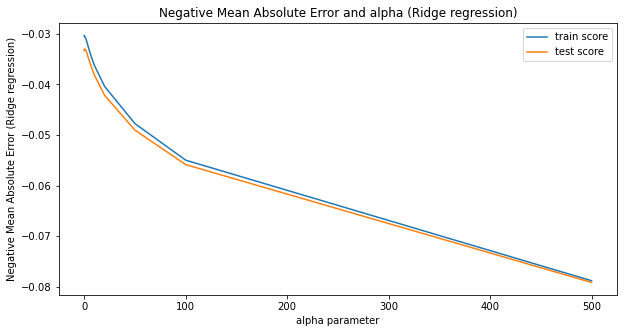

In [190]:
# plotting Negative Mean Absolute Error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(10,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha (Ridge regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [191]:
ridge_model_cv.best_params_

{'alpha': 0.8}

In [192]:
# Hyperparameter lambda = 1.0

alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01788532,  0.04604664,  0.19817757,  0.11710158, -0.05840316,
        0.11954707,  0.3042726 ,  0.0225909 ,  0.074375  ,  0.02235876,
        0.01963161,  0.06006929,  0.02517464,  0.03698368,  0.0381815 ,
        0.0197624 ,  0.02233817,  0.02930822,  0.05857846,  0.0334212 ,
        0.04690296,  0.01375782,  0.01552347,  0.03767712, -0.02321337,
       -0.04585717,  0.02578028,  0.02498182,  0.01954294, -0.02533018,
       -0.01666175,  0.02464555,  0.02281851,  0.01027925,  0.02451125,
        0.01460172,  0.0292044 ,  0.02149757, -0.10554171,  0.0274492 ,
       -0.02843391,  0.01574571, -0.03545912, -0.02843391,  0.02723768,
        0.02495046,  0.04725063,  0.04949687,  0.03178903, -0.02542749])

In [193]:
# mse
mean_squared_error(y_test, ridge.predict(X_test))

0.002710420257551255

In [194]:
# predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9169841523190353


In [195]:
#predicting the R2 value of test data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8757549046966173


In [196]:
# house_pricing_ridge: Features and coefficienst of Ridge

house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

Features  Coefficient
0                MSSubClass      -0.0179
1                   LotArea       0.0460
2               OverallQual       0.1982
3               OverallCond       0.1171
4                 BsmtUnfSF      -0.0584
5               TotalBsmtSF       0.1195
6                 GrLivArea       0.3043
7              BsmtFullBath       0.0226
8                GarageArea       0.0744
9               OpenPorchSF       0.0224
10                newGarage       0.0196
11                 BsmtQual       0.0601
12             BsmtExposure       0.0252
13                HeatingQC       0.0370
14              KitchenQual       0.0382
15              FireplaceQu       0.0198
16             GarageFinish       0.0223
17            SaleCondition       0.0293
18              MSZoning_FV       0.0586
19              MSZoning_RH       0.0334
20              MSZoning_RL       0.0469
21              MSZoning_RM       0.0138
22     Neighborhood_BrkSide       0.0155
23     Neighborhood_Crawfor       0.0377
24     Neighborhood_Edwards      -0.0232
25     Neighborhood_MeadowV      -0.0459
26     Neighborhood_NPkVill       0.0258
27     Neighborhood_NoRidge       0.0250
28     Neighborhood_NridgHt       0.0195
29     Neighborhood_OldTown      -0.0253
30      Neighborhood_Sawyer      -0.0167
31     Neighborhood_StoneBr       0.0246
32     Neighborhood_Veenker       0.0228
33          RoofStyle_Gable       0.0103
34        RoofStyle_Gambrel       0.0245
35            RoofStyle_Hip       0.0146
36        RoofStyle_Mansard       0.0292
37      Exterior1st_AsphShn       0.0215
38      Exterior1st_BrkComm      -0.1055
39      Exterior1st_BrkFace       0.0274
40       Exterior1st_CBlock      -0.0284
41      Exterior1st_CemntBd       0.0157
42      Exterior1st_Wd Sdng      -0.0355
43       Exterior2nd_CBlock      -0.0284
44      Exterior2nd_Wd Sdng       0.0272
45        Foundation_CBlock       0.0250
46         Foundation_PConc       0.0473
47          Foundation_Slab       0.0495
48         Foundation_Stone       0.0318
49  GarageType_NotAvailable      -0.0254

In [197]:
# dictionary of Features and Coefficients

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0179,
 'LotArea': 0.046,
 'OverallQual': 0.1982,
 'OverallCond': 0.1171,
 'BsmtUnfSF': -0.0584,
 'TotalBsmtSF': 0.1195,
 'GrLivArea': 0.3043,
 'BsmtFullBath': 0.0226,
 'GarageArea': 0.0744,
 'OpenPorchSF': 0.0224,
 'newGarage': 0.0196,
 'BsmtQual': 0.0601,
 'BsmtExposure': 0.0252,
 'HeatingQC': 0.037,
 'KitchenQual': 0.0382,
 'FireplaceQu': 0.0198,
 'GarageFinish': 0.0223,
 'SaleCondition': 0.0293,
 'MSZoning_FV': 0.0586,
 'MSZoning_RH': 0.0334,
 'MSZoning_RL': 0.0469,
 'MSZoning_RM': 0.0138,
 'Neighborhood_BrkSide': 0.0155,
 'Neighborhood_Crawfor': 0.0377,
 'Neighborhood_Edwards': -0.0232,
 'Neighborhood_MeadowV': -0.0459,
 'Neighborhood_NPkVill': 0.0258,
 'Neighborhood_NoRidge': 0.025,
 'Neighborhood_NridgHt': 0.0195,
 'Neighborhood_OldTown': -0.0253,
 'Neighborhood_Sawyer': -0.0167,
 'Neighborhood_StoneBr': 0.0246,
 'Neighborhood_Veenker': 0.0228,
 'RoofStyle_Gable': 0.0103,
 'RoofStyle_Gambrel': 0.0245,
 'RoofStyle_Hip': 0.0146,
 'RoofStyle_Mansard': 0.0292,
 'Ext

In [198]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[house_pricing_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [199]:
# coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
4         GrLivArea         True            1       0.3043
0       OverallQual         True            1       0.1982
3       TotalBsmtSF         True            1       0.1195
1       OverallCond         True            1       0.1171
5        GarageArea         True            1       0.0744
6          BsmtQual         True            1       0.0601
9       MSZoning_FV         True            1       0.0586
14  Foundation_Slab         True            1       0.0495
10      MSZoning_RL         True            1       0.0469
8       KitchenQual         True            1       0.0382

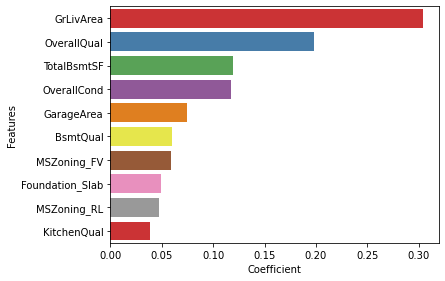

In [200]:
# bar plot for predictor variables.

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

## Lasso - Regularization

In [201]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [202]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.030789        -0.033128                1
1       0.0002         -0.031389        -0.033512                2
2       0.0003         -0.032043        -0.034033                3
3       0.0004         -0.032538        -0.034400                4
4       0.0005         -0.032970        -0.034696                5
5        0.001         -0.035075        -0.036499                6
6        0.002         -0.039748        -0.041017                7
7        0.003         -0.043784        -0.044825                8
8        0.004         -0.048054        -0.049042                9
9        0.005         -0.052546        -0.053373               10
10        0.01         -0.075650        -0.076437               11

In [203]:
# plotting Negative Mean Absolute Error vs alpha for train and test

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,5))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [204]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [205]:
# # Hyperparameter lambda = 0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01996421,  0.03530599,  0.2217882 ,  0.11956788, -0.06229885,
        0.12628034,  0.32942307,  0.02137765,  0.07137528,  0.0182165 ,
        0.01948774,  0.05104797,  0.0223787 ,  0.03378971,  0.03482446,
        0.016984  ,  0.02065237,  0.02969937,  0.04280431,  0.00937942,
        0.03296465, -0.        ,  0.01111865,  0.03345694, -0.02033685,
       -0.03265628,  0.00871662,  0.01367337,  0.01557011, -0.02847967,
       -0.01456988,  0.01435836,  0.01478607, -0.0027602 ,  0.        ,
        0.        ,  0.00132832,  0.        , -0.12302639,  0.02584512,
       -0.        ,  0.00969373, -0.03057108, -0.        ,  0.02140774,
        0.02152155,  0.04399895,  0.04062957,  0.01313635, -0.02366052])

In [206]:
# mse
mean_squared_error(y_test, lasso.predict(X_test))

0.0027038365859330792

In [207]:
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9161022194635169


In [208]:
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8760566988207453


In [209]:
# house_pricing_lasso: Features and coefficienst of Lasso

house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

Features  Coefficient
0                MSSubClass      -0.0200
1                   LotArea       0.0353
2               OverallQual       0.2218
3               OverallCond       0.1196
4                 BsmtUnfSF      -0.0623
5               TotalBsmtSF       0.1263
6                 GrLivArea       0.3294
7              BsmtFullBath       0.0214
8                GarageArea       0.0714
9               OpenPorchSF       0.0182
10                newGarage       0.0195
11                 BsmtQual       0.0510
12             BsmtExposure       0.0224
13                HeatingQC       0.0338
14              KitchenQual       0.0348
15              FireplaceQu       0.0170
16             GarageFinish       0.0207
17            SaleCondition       0.0297
18              MSZoning_FV       0.0428
19              MSZoning_RH       0.0094
20              MSZoning_RL       0.0330
21     Neighborhood_BrkSide       0.0111
22     Neighborhood_Crawfor       0.0335
23     Neighborhood_Edwards      -0.0203
24     Neighborhood_MeadowV      -0.0327
25     Neighborhood_NPkVill       0.0087
26     Neighborhood_NoRidge       0.0137
27     Neighborhood_NridgHt       0.0156
28     Neighborhood_OldTown      -0.0285
29      Neighborhood_Sawyer      -0.0146
30     Neighborhood_StoneBr       0.0144
31     Neighborhood_Veenker       0.0148
32          RoofStyle_Gable      -0.0028
33        RoofStyle_Mansard       0.0013
34      Exterior1st_BrkComm      -0.1230
35      Exterior1st_BrkFace       0.0258
36      Exterior1st_CemntBd       0.0097
37      Exterior1st_Wd Sdng      -0.0306
38      Exterior2nd_Wd Sdng       0.0214
39        Foundation_CBlock       0.0215
40         Foundation_PConc       0.0440
41          Foundation_Slab       0.0406
42         Foundation_Stone       0.0131
43  GarageType_NotAvailable      -0.0237

In [210]:
# dictionary of Features and Coefficients

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.019964211904591623,
 'LotArea': 0.03530598666224829,
 'OverallQual': 0.22178819955350149,
 'OverallCond': 0.11956788143842667,
 'BsmtUnfSF': -0.06229885322131107,
 'TotalBsmtSF': 0.12628033705464106,
 'GrLivArea': 0.32942307097739726,
 'BsmtFullBath': 0.021377650370733654,
 'GarageArea': 0.0713752764780943,
 'OpenPorchSF': 0.018216497285469167,
 'newGarage': 0.01948774054632534,
 'BsmtQual': 0.05104797295834812,
 'BsmtExposure': 0.02237869859597223,
 'HeatingQC': 0.03378971185280906,
 'KitchenQual': 0.03482445509475934,
 'FireplaceQu': 0.016983997218426545,
 'GarageFinish': 0.020652369582172363,
 'SaleCondition': 0.029699372018274675,
 'MSZoning_FV': 0.04280431258045482,
 'MSZoning_RH': 0.009379420527173655,
 'MSZoning_RL': 0.03296465133700437,
 'MSZoning_RM': -0.0,
 'Neighborhood_BrkSide': 0.01111864561253305,
 'Neighborhood_Crawfor': 0.033456940774773465,
 'Neighborhood_Edwards': -0.02033685203356519,
 'Neighborhood_MeadowV': -0.03265628453065674,
 'Neighborhood_NPk

In [211]:
# RFE : minimising features to 15

X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select = 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [212]:
# coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
5         GrLivArea         True            1     0.329423
1       OverallQual         True            1     0.221788
4       TotalBsmtSF         True            1     0.126280
2       OverallCond         True            1     0.119568
6        GarageArea         True            1     0.071375
7          BsmtQual         True            1     0.051048
11      MSZoning_FV         True            1     0.042804
14  Foundation_Slab         True            1     0.040630
0           LotArea         True            1     0.035306
9       KitchenQual         True            1     0.034824

In [213]:
#  bar plot for predictor variables.

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [214]:
#lets predict the R-squared value of test
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8760566988207453


### Conclusion:

* Hyperparameter Lambda:
  - Ridge : 1.0
  - Lasso : 0.0001
  
* R2 value on train data & test data for Ridge & Lasso
  - Train : Ridge(0.92), Lasso(0.91)
  - Test : Ridge(0.87), Lasso(0.87)
  
* MSE
  - Ridge : 0.002728
  - Lasso : 0.002730
  
* Lasso helps to reduce few coeefients to 0. So Lasso will be better compare to Ridge

* Following factores are the good predictor and impact on the sales price of House.
  - Ridge : OverallQual, 1stFlrSF, OverallCond, TotalBsmtSF, 2ndFlrSF, GarageArea, BsmtQual, MSZonoing_FV(Floating Village   
            Residential), MSZonoing_RL(Residential Low Density), Foundation Slab.
  - Lasso : OverallQual, 1stFlrSF, TotalBsmtSF, OverallCond, 2ndFlrSF, GarageArea, BsmtQual, LotArea, Foundation Slab,  
            KitchenQual.